In [2]:
import tensorflow as tf

print("tensorflow version:", tf.__version__)

tensorflow version: 1.10.0


# Loading MNIST dataset

In [3]:
mnist = tf.keras.datasets.mnist

__Train Test Split__

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt

__A single image is represented as a 2D matrix.__

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

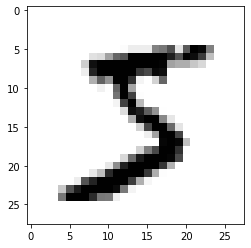

In [7]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

# Scaling features (`X`)

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

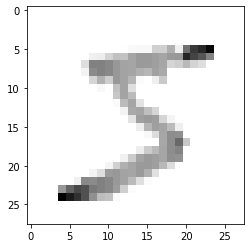

In [9]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

# Building a model

Building a model:
1. Input layer takes the 28x28 image as a flat 1x784 vector.
2. The two hidden layers each have 128 neurons.
3. The output layer has 10 neurons representing the 10 numbers of the decimal system.

In [10]:
# Initializing model
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten())
# Hidden Layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Hidden Layer 2
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compiling model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Training model

In [11]:
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 7s 110us/step - loss: 0.2636 - acc: 0.9230
Epoch 2/7
60000/60000 [==============================] - 5s 83us/step - loss: 0.1045 - acc: 0.9680
Epoch 3/7
60000/60000 [==============================] - 5s 86us/step - loss: 0.0711 - acc: 0.9775
Epoch 4/7
60000/60000 [==============================] - 5s 86us/step - loss: 0.0518 - acc: 0.9834
Epoch 5/7
60000/60000 [==============================] - 5s 86us/step - loss: 0.0402 - acc: 0.9871
Epoch 6/7
60000/60000 [==============================] - 6s 93us/step - loss: 0.0320 - acc: 0.9897
Epoch 7/7
60000/60000 [==============================] - 5s 89us/step - loss: 0.0254 - acc: 0.9913


# Evaluating model

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss     :", val_loss)
print("Validation accuracy :", val_acc)

10000/10000 [==============================] - 0s 34us/step
Validation loss     : 0.10494113170825876
Validation accuracy : 0.9728


# Saving & Loading Models

In [13]:
model_name = "digit_reader_seq.model"

In [14]:
model.save(model_name)

In [15]:
new_model = tf.keras.models.load_model(model_name)

# Prediction

In [16]:
new_mod_preds = new_model.predict([X_test])

Checking if prediction is correct:


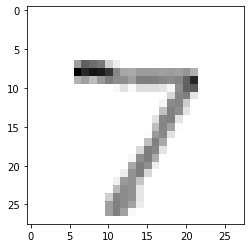

In [18]:
print("Checking if prediction is correct:")
plt.imshow(X_test[0], cmap=plt.cm.binary)

In [20]:
print("Model pridiction:", new_mod_preds[0].argmax())

Model pridiction: 7
